# EDA / sandbox

In [4]:
import random
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
from datetime import datetime

sns.set_theme()

In [5]:
test = pd.read_csv("./data/accidents_engineered_binary.csv")

In [12]:
test.grav.value_counts(normalize=True)

0    0.609279
1    0.390721
Name: grav, dtype: float64

In [3]:
def print_random_cell_value(df, column_name):
    column_values = df[column_name].dropna().values
    if len(column_values) > 0:
        random_value = random.choice(column_values)
        print(f"Random value from column '{column_name}': {random_value}")
    else:
        print(f"No valid values in column '{column_name}'")

def get_nan_percentage_in_col(df, col):
    col = "secu"
    proportion_na = round(df[col].isna().sum() / len(df) * 100, 2)
    print(f"{proportion_na}% of rows in column '{col}' with missing values.")
    return proportion_na

def plot_missing_proportion_per_category(df, missing_column, category_column):
    # Group the DataFrame by the category column and calculate the proportion of missing values
    grouped = df.groupby(category_column)[missing_column].apply(lambda x: x.isnull().mean())

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel(category_column)
    plt.ylabel("Proportion of missing values")
    plt.title(f"Proportion of missing values in '{missing_column}' per '{category_column}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_unique_proportion_per_category(df, unique_column, category_column):
    # Group the DataFrame by the category column and calculate the proportion of missing values
    grouped = df.groupby(category_column)[unique_column].apply(lambda x: x.nunique())

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel(unique_column)
    plt.ylabel("Count of unique values")
    plt.title(f"Count of unique values in '{unique_column}' per '{category_column}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_unique_proportion_per_category(df, numeric_column, category_column, func, measure):
    # Group the DataFrame by the category column and calculate the proportion of missing values
    grouped = df.groupby(category_column)[numeric_column].apply(lambda x: func)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel(unique_column)
    plt.ylabel(f"{measure}{numeric_column} values")
    plt.title(f"{measure }{numeric_column} per {category_column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def func(x):
    return x.nunique()

def plot_missing_value_proportion_by_column(df):
    plot_df = df.isna().sum() / len(df) * 100
    plot_df = plot_df[plot_df.values > 20]
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(plot_df.index, plot_df.values)
    plt.xlabel("Columns")
    plt.ylabel("%")
    plt.title(f"Percentage of missing values per column")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_missing_value_matrix(missing_values_df):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a heatmap of missing values
    cax = ax.imshow(missing_values_df, cmap="gray", aspect="auto")

    # Add color bar legend
    cbar = fig.colorbar(cax, ticks=[0, 1], orientation="vertical", ax=ax)
    cbar.ax.set_yticklabels(["Present", "Missing"])

    # Set x and y axis labels
    ax.set_xticks(np.arange(len(missing_values_df.columns)))
    ax.set_yticks(np.arange(len(missing_values_df.index)))
    ax.set_xticklabels(missing_values_df.columns, rotation=90)
    ax.set_yticklabels(missing_values_df.index)

    # Hide grid lines
    ax.grid(False)

    # Set plot title
    ax.set_title("Missing Value Matrix")

    # Show the plot
    plt.tight_layout()
    plt.show()


In [4]:
start = time.time()

df = pd.read_csv("./data/accidents_preprocessed.csv")
merged_df = pd.read_csv("./data/accidents.csv")

end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print(f"Loaded dataset in {round(total_time, 2)}s")

/tmp/ipykernel_22270/2097944010.py:4: DtypeWarning: Columns (1,14,25,32,33,35,36,44,50,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("./data/accidents.csv")


Loaded dataset in 19.55s


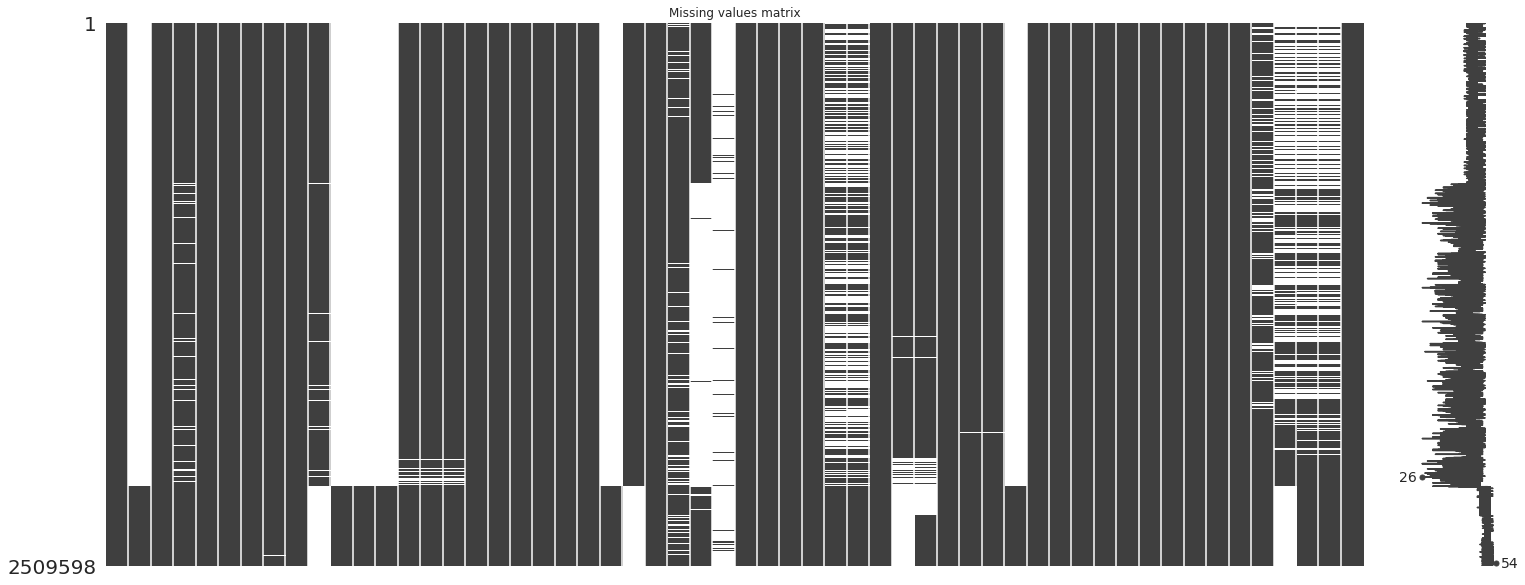

In [7]:
%matplotlib inline
msno.matrix(merged_df)
#missing_values_df = merged_df.isna()
#plot_missing_value_matrix(missing_values_df)
plt.title("Missing values matrix")
plt.savefig("./plots/missing_values_matrix.png")#, dpi=150)
plt.show()

## Create cross-tabulations between each categorical feature and the target variable

In [ ]:
for cat_feature in df.select_dtypes(include='object'):
    cross_tab = pd.crosstab(df[cat_feature], df['grav'])
    print(cross_tab)

    # Perform Chi-square test for independence
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print("Chi-square:", chi2)
    print("P-value:", p)

## Convert predicted column

In [ ]:
mapping = "binary"
if mapping == "binary":
    binary_mapping = {1: 0,
                      2: 0,
                      3: 1,
                      4: 1}

    df["grav"] = df["grav"].map(binary_mapping)
    
    grav_order = [1, 2, 3, 4]
    df["grav"] = pd.Categorical(df["grav"])

if mapping == "ordinal":
    grav_order = [1, 2, 3, 4]
    df["grav"] = pd.Categorical(df["grav"], categories=grav_order, ordered=True)

## Convert columns to categorical

In [15]:
cat_columns = ["col", "prof", "plan", "situ", "obs", "choc", "manv",
               "lum", "agg", "catr", "circ", "catv", "catu", "sexe"]

for col in cat_columns:
    df[col] = df[col].astype("category")

In [ ]:
#baseline_accuracy_score = pred_df[1] / pred_df.values.sum()
#baseline_accuracy_score

In [ ]:
df.info()

In [ ]:
df.grav.value_counts(normalize=True).sort_index()

## Sandbox

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="EDA Report", explorative=True)

# Save the report to an HTML file
profile.to_file("eda_report_preprocessed.html")

In [ ]:
df_killed = df[df["grav"]==4]
profile = ProfileReport(df_killed, title="EDA Report", explorative=True, minimal=True)

# Save the report to an HTML file
profile.to_file("eda_report_killed.html")

In [ ]:
df_uninjured = df[df["grav"]==1]
profile = ProfileReport(df_uninjured, title="EDA Report", explorative=True, minimal=True)

# Save the report to an HTML file
profile.to_file("eda_report_uninjured.html")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

# Perform Chi-Square Test
def chi_square_test(df, feature, target):
    confusion_matrix = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    return chi2, p

# Calculate Cramér's V for a given feature and target
def cramers_v_for_feature(df, feature, target):
    confusion_matrix = pd.crosstab(df[feature], df[target])
    return cramers_v(confusion_matrix)

# Usage example:
target = "grav"
for feature in df.columns:
    if feature != target:
        chi2, p = chi_square_test(df, feature, target)
        cramers_v_value = cramers_v_for_feature(df, feature, target)
        print(f"Feature: '{feature}', Chi-Square: {chi2}, p-value: {p}, Cramér's V: {cramers_v_value}")


In [ ]:
print_random_cell_value(df, "hrmn")

## Numerical EDA

In [ ]:
df.isna().sum() / len(df) * 100

In [ ]:
get_nan_percentage_in_col(df, "grav")

In [ ]:
# Plot the proportion of missing values in 'Value' per 'Category'
plot_missing_proportion_per_category(df, 'grav', 'an')

In [ ]:
## Check for Independence of Observations (not applicable in this synthetic example)
## Correlation matrix
## Drop any rows with missing values to ensure proper correlation analysis
#df.dropna(inplace=True)
#
## Compute the correlation matrix
#correlation_matrix = df.corr()
#
## Check for Multicollinearity (Correlation Plot)
#correlation_matrix = df.corr()
#
#plt.figure(figsize=(6, 5))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Plot for Multicollinearity Check")
#plt.show()
#
## Plot the correlation matrix as a heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Plot")
#plt.show()
#
## Check for Linearity
#plt.figure(figsize=(10, 5))
#plt.scatter(df['x1'], df['y'], label='x1 vs y', color='b')
#plt.scatter(df['x2'], df['y'], label='x2 vs y', color='r')
#plt.xlabel('x1 and x2')
#plt.ylabel('y')
#plt.legend()
#plt.title('Scatter Plot for Linearity Check')
#plt.show()
#
## Check for Homoscedasticity (Residuals vs. Predicted)
#X = df[['x1', 'x2']]
#y = df['y']
#X = sm.add_constant(X)  # Adding constant for intercept in statsmodels
#model = sm.OLS(y, X).fit()
#residuals = model.resid
#
#plt.figure(figsize=(8, 5))
#plt.scatter(model.predict(), residuals)
#plt.axhline(y=0, color='r', linestyle='dashed')
#plt.xlabel('Predicted Values')
#plt.ylabel('Residuals')
#plt.title('Residuals vs. Predicted for Homoscedasticity Check')
#plt.show()
#
## Check for Normality of Residuals (Histogram and Q-Q plot)
#plt.figure(figsize=(10, 4))
#
#plt.subplot(1, 2, 1)
#plt.hist(residuals, bins=15, edgecolor='black')
#plt.xlabel('Residuals')
#plt.ylabel('Frequency')
#plt.title('Histogram of Residuals')
#
#plt.subplot(1, 2, 2)
#sm.qqplot(residuals, line='s', color='g')
#plt.title('Q-Q Plot of Residuals')
#
#plt.tight_layout()
#plt.show()
#
## Check for Multicollinearity (Correlation Plot)
#correlation_matrix = df.corr()
#
#plt.figure(figsize=(6, 5))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Plot for Multicollinearity Check")
#plt.show()
#
## Check for Outliers (Box Plot)
#plt.figure(figsize=(8, 5))
#df.boxplot(column=['x1', 'x2', 'y'])
#plt.title("Box Plot for Outliers Check")
plt.show()

In [ ]:
plot_missing_value_proportion_by_column(df)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
## Grpahical EDA

In [ ]:
fig_size = (8, 4)
ax = df.grav.value_counts(normalize=True).sort_index().plot(kind="bar", figsize=fig_size)
ax.set_ylim(0, 1)
ax.set_xlabel("Gravity category")
ax.set_ylabel("Proportion of occurences")
ax.set_title("Gravity category distribution")

# Replace x ticks (optional)
# In this example, I'm assuming you want to replace the tick labels
# 'Low', 'Medium', and 'High' with 'L', 'M', and 'H', respectively.
new_tick_labels = {"1": "Unharmed", "2": "Minor injuries", "3": "Serious injuries", "4": "Killed"}
ax.set_xticklabels([new_tick_labels[label.get_text()] for label in ax.get_xticklabels()],
                    rotation=0)
plt.show()

In [ ]:
category_proportions = df["grav"].value_counts(normalize=True)

import seaborn as sns

# Plotting the proportions using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
sns.barplot(x=category_proportions.index, y=category_proportions.values)
plt.xlabel("Categories")
plt.ylabel("Proportion")
plt.title("Proportion of Each Category")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional: Add grid lines
plt.tight_layout()
plt.show()



In [6]:
start = time.time()

df = pd.read_csv("./data/accidents_preprocessed.csv")

end = time.time()

cat_columns = ["col", "prof", "plan", "situ", "obs", "choc", "manv",
               "lum", "agg", "catr", "circ", "catv", "catu", "sexe"]

for col in cat_columns:
    df[col] = df[col].astype("category")

mapping = "binary"
if mapping == "binary":
    binary_mapping = {1: 0,
                      2: 0,
                      3: 1,
                      4: 1}

    df["grav"] = df["grav"].map(binary_mapping)
    
    grav_order = [1, 2, 3, 4]
    df["grav"] = pd.Categorical(df["grav"])

mapping = "binary"
if mapping == "ordinal":
    grav_order = [1, 2, 3, 4]
    df["grav"] = pd.Categorical(df["grav"], categories=grav_order, ordered=True)
if mapping == "binary":
    df["grav"] = pd.Categorical(df["grav"])

#Subtract Start Time from The End Time
total_time = end - start
print(f"Loaded dataset in {round(total_time, 2)}s")
df.info()

Loaded dataset in 9.8s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355812 entries, 0 to 2355811
Data columns (total 23 columns):
 #   Column         Dtype   
---  ------         -----   
 0   col            category
 1   lum            category
 2   agg            category
 3   catr           category
 4   circ           category
 5   nbv            float64 
 6   prof           category
 7   plan           category
 8   situ           category
 9   catv           category
 10  obs            category
 11  choc           category
 12  manv           category
 13  catu           category
 14  sexe           category
 15  grav           category
 16  age            float64 
 17  month_sin      float64 
 18  month_cos      float64 
 19  DayOfWeek_sin  float64 
 20  DayOfWeek_cos  float64 
 21  TimeOfDay_sin  float64 
 22  TimeOfDay_cos  float64 
dtypes: category(15), float64(8)
memory usage: 177.5 MB


In [16]:
plot_df = pd.read_csv("./data/metrics.csv", sep=";")

In [18]:
plot_df["Dataset"]

,Model,Best Model Parameters,Dataset,F1-score,Precision,Recall,ROC-AUC,Training Time
0,Logistic Regression,"{'clf__C': 10, 'clf__solver': 'lbfgs'}",Validation Set,0.3818,0.5921,0.2818,0.5807,0.83s
1,Logistic Regression,"{'clf__C': 10, 'clf__solver': 'lbfgs'}",Test Set,0.3703,0.5816,0.2716,0.5734,NaN
2,XGBoost,"{'clf__learning_rate': 0.3, 'clf__max_depth': ...",Validation Set,0.8236,0.8781,0.7754,0.8543,19.32s
3,XGBoost,"{'clf__learning_rate': 0.3, 'clf__max_depth': ...",Test Set,0.5666,0.6127,0.5269,0.6570,NaN
4,Random Forest,"{'clf__class_weight': {0: 1, 1: 3}, 'clf__max_...",Validation Set,0.6524,0.5024,0.9301,0.6796,518.10s
5,Random Forest,"{'clf__class_weight': {0: 1, 1: 3}, 'clf__max_...",Test Set,0.6157,0.4676,0.9009,0.6228,NaN
6,Support Vector Machine,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",Validation Set,0.9710,0.9764,0.9656,0.9756,4173.83s
7,Support Vector Machine,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",Test Set,0.5064,0.5324,0.4829,0.6059,NaN


In [45]:
valid_df = plot_df[plot_df["Dataset"]=="Validation Set"]
test_df = plot_df[plot_df["Dataset"]=="Test Set"]

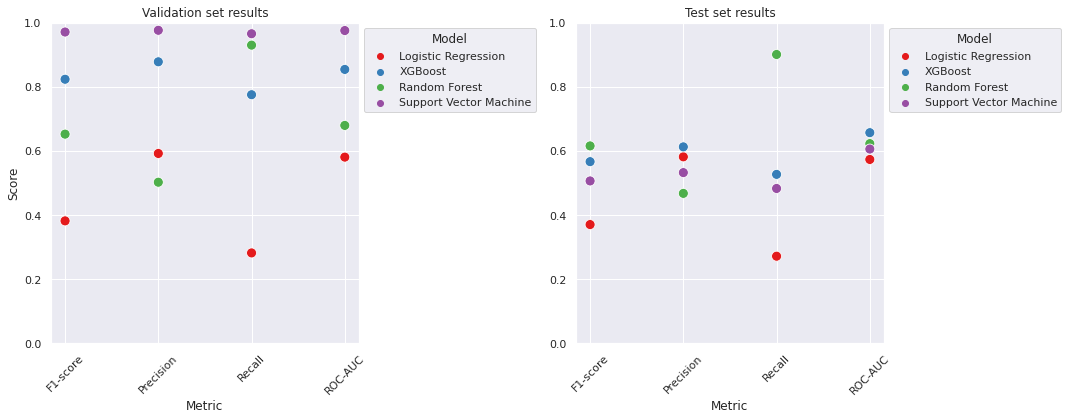

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'XGBoost', 'XGBoost', 'Random Forest', 'Random Forest', 'Support Vector Machine', 'Support Vector Machine'],
    'Dataset': ['Validation Set', 'Test Set', 'Validation Set', 'Test Set', 'Validation Set', 'Test Set', 'Validation Set', 'Test Set'],
    'F1-score': [0.3818, 0.3703, 0.8236, 0.5666, 0.6524, 0.6157, 0.9710, 0.5064],
    'Precision': [0.5921, 0.5816, 0.8781, 0.6127, 0.5024, 0.4676, 0.9764, 0.5324],
    'Recall': [0.2818, 0.2716, 0.7754, 0.5269, 0.9301, 0.9009, 0.9656, 0.4829],
    'ROC-AUC': [0.5807, 0.5734, 0.8543, 0.6570, 0.6796, 0.6228, 0.9756, 0.6059],
    'Training Time': ['0.83s', None, '19.32s', None, '518.10s', None, '4173.83s', None]
}

df = pd.DataFrame(data)

# Filter dataframes for validation and test sets
valid_df = df[df['Dataset'] == 'Validation Set']
test_df = df[df['Dataset'] == 'Test Set']

# Melt the dataframes to combine metrics into one column and scores into another
valid_melted = valid_df.melt(id_vars=['Model'], value_vars=['F1-score', 'Precision', 'Recall', 'ROC-AUC'], var_name='Metric', value_name='Score')
test_melted = test_df.melt(id_vars=['Model'], value_vars=['F1-score', 'Precision', 'Recall', 'ROC-AUC'], var_name='Metric', value_name='Score')

# Combine both dataframes for plotting
combined_df = pd.concat([valid_melted, test_melted])

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the validation set scores on the left subplot
sns.scatterplot(x='Metric', y='Score', hue='Model', data=valid_melted, s=100, ax=axs[0])
axs[0].set_title('Validation set results')
axs[0].set_ylim(0, 1)
axs[0].set_xlabel('Metric')
axs[0].set_ylabel('Score')
axs[0].legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
axs[0].tick_params(axis='x', rotation=45)

# Plot the test set scores on the right subplot
sns.scatterplot(x='Metric', y='Score', hue='Model', data=test_melted, s=100, ax=axs[1])
axs[1].set_title('Test set results')
axs[1].set_ylim(0, 1)
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('')
axs[1].legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
axs[1].tick_params(axis='x', rotation=45)

# Adjust the layout for better visualization
plt.tight_layout()
plt.savefig("./plots/validation_vs_testing_metrics.png")
plt.show()


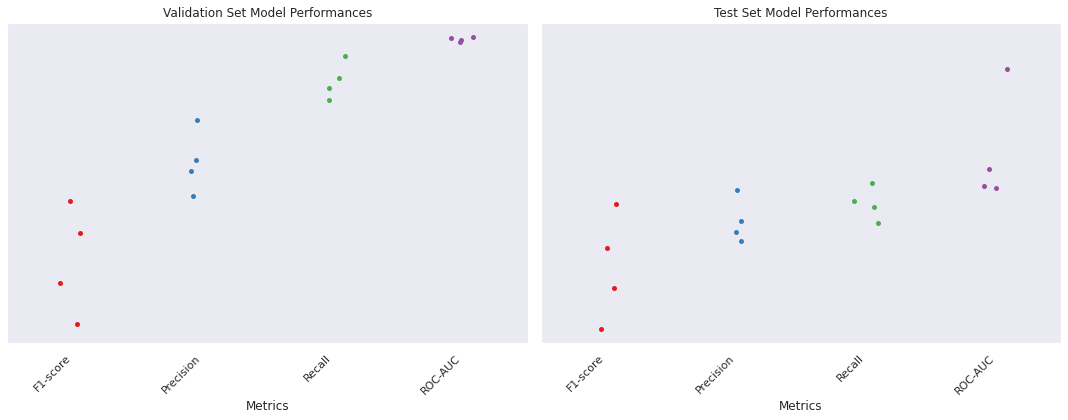

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame (I'll assume it's already loaded)

# Define the metrics and datasets
metrics = ['F1-score', 'Precision', 'Recall', 'ROC-AUC']
datasets = ['Validation Set', 'Test Set']

# Create a subplot with two plots (one for each dataset)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.set_palette("Set1")

# Plot the metric performances for each model on each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]

    # Filter data to get only the rows for the current dataset
    data_subset = plot_df[plot_df['Dataset'] == dataset]

    # Create the strip plot for the current dataset
    for j, metric in enumerate(metrics):
        sns.stripplot(x=metric, y=metric, data=data_subset, ax=ax, jitter=True, dodge=True, hue='Model')

    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('')  # Remove y-axis label
    ax.set_title(f'{dataset} Model Performances')

# Remove y-axis ticks and labels from the right plot (Test Set)
axes[1].set_yticks([])

plt.tight_layout()
plt.show()


In [30]:
plot_df[plot_df['Dataset'] == dataset]

,Model,Best Model Parameters,Dataset,F1-score,Precision,Recall,ROC-AUC,Training Time
0,Logistic Regression,"{'clf__C': 10, 'clf__solver': 'lbfgs'}",Validation Set,0.3818,0.5921,0.2818,0.5807,0.83s
2,XGBoost,"{'clf__learning_rate': 0.3, 'clf__max_depth': ...",Validation Set,0.8236,0.8781,0.7754,0.8543,19.32s
4,Random Forest,"{'clf__class_weight': {0: 1, 1: 3}, 'clf__max_...",Validation Set,0.6524,0.5024,0.9301,0.6796,518.10s
6,Support Vector Machine,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",Validation Set,0.9710,0.9764,0.9656,0.9756,4173.83s


In [26]:
df[df['Dataset'] == "Validation Set"]

,Model,Dataset,Metric,Score
